# 0. Magic Commands


In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# 1. Import Library

In [2]:
from fastai import *
from fastai.vision import *
from fastai.metrics import accuracy

# 2. ข้อมูล

ใช้ชุดข้อมูล Dataset [MNIST](http://yann.lecun.com/exdb/mnist/) ตัวเลขฮินดูอารบิคเขียนด้วยลายมือ

In [3]:
path = untar_data(URLs.MNIST)
path

PosixPath('/home/jupyter/.fastai/data/mnist_png')

In [4]:
path.ls()

[PosixPath('/home/jupyter/.fastai/data/mnist_png/models'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/testing')]

In [5]:
(path/'training').ls()

[PosixPath('/home/jupyter/.fastai/data/mnist_png/training/9'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training/7'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training/2'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training/6'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training/1'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training/4'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training/5'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training/0'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training/8'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training/3')]

- minst_png
  - training
    - 0
    - 1
    - 2
    - 3
    - 4
    - 5
    - 6
    - 7 
    - 8
    - 9    

In [6]:
# (path_training/'5').ls()

# 3. เตรียมข้อมูล



In [7]:
batchsize = 128
np.random.seed(0)
transform = get_transforms(do_flip=False)

databunch = ImageDataBunch.from_folder(path, train='training', valid_pct=0.2, size=28, 
                                       ds_tfms=transform, bs=batchsize, num_workers=8).normalize()

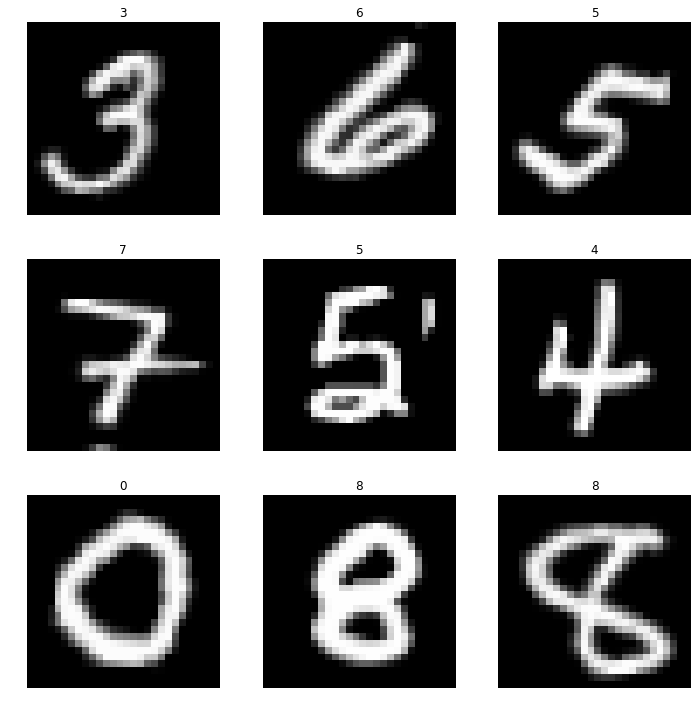

In [8]:
databunch.show_batch(rows=3, figsize=(10, 10))

In [9]:
databunch.classes

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [10]:
learner = cnn_learner(databunch, models.resnet18, metrics=accuracy)

In [11]:
learner.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.779039,0.611004,0.804429,00:14
1,0.374637,0.274633,0.912500,00:14
2,0.255548,0.196428,0.936571,00:14
3,0.248589,0.178667,0.943143,00:14


In [12]:
learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


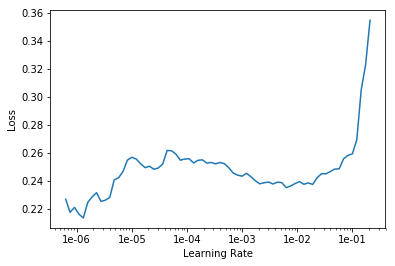

In [13]:
learner.recorder.plot()

In [14]:
learner.unfreeze()

In [15]:
learner.fit_one_cycle(3, max_lr=slice(1e-6, 3e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.141914,0.092159,0.971000,00:15
1,0.087702,0.061525,0.980143,00:14
2,0.067875,0.052204,0.982786,00:14


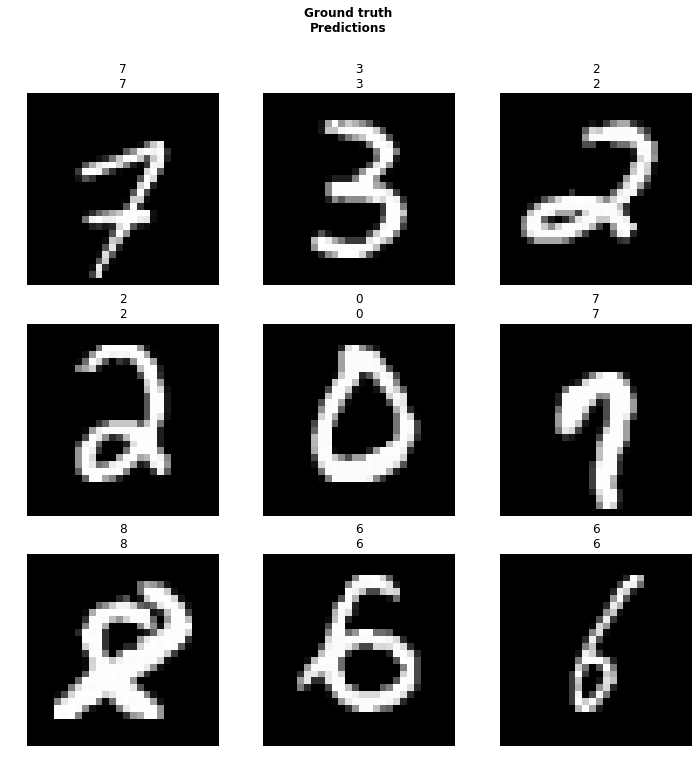

In [16]:
learner.show_results(rows=3)

In [17]:
interpretation = ClassificationInterpretation.from_learner(learner)

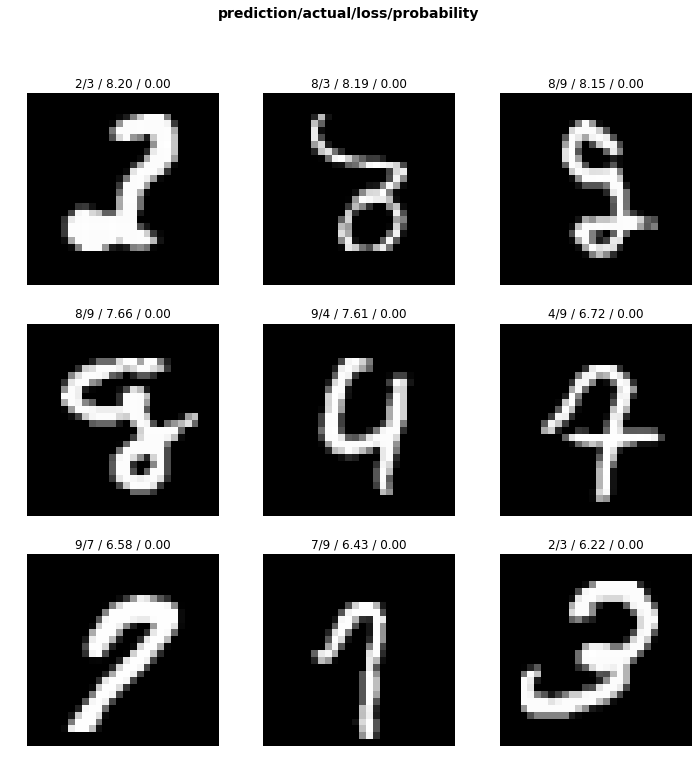

In [18]:
interpretation.plot_top_losses(9)

In [19]:
path_test = Path()/'data'

In [20]:
path_test.ls()

[PosixPath('data/a007.png'),
 PosixPath('data/a003.png'),
 PosixPath('data/a005.png'),
 PosixPath('data/.ipynb_checkpoints')]

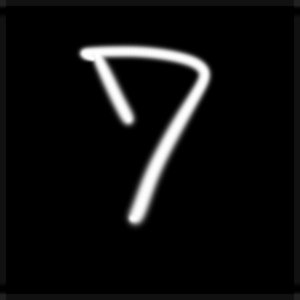

In [21]:
test_image = open_image('data/a007.png')
test_image

In [22]:
learner.predict(test_image)

(Category 7,
 tensor(7),
 tensor([1.0206e-04, 6.6924e-03, 1.3379e-03, 2.7448e-04, 5.7203e-04, 2.4343e-04,
         1.2580e-05, 9.8777e-01, 3.1488e-04, 2.6824e-03]))

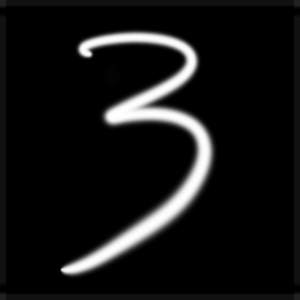

In [23]:
test_image = open_image('data/a003.png')
test_image

In [24]:
learner.predict(test_image)

(Category 3,
 tensor(3),
 tensor([3.8953e-06, 2.0142e-06, 9.3160e-05, 9.9546e-01, 1.6139e-05, 8.5931e-04,
         3.6914e-06, 3.5372e-04, 3.9220e-04, 2.8109e-03]))

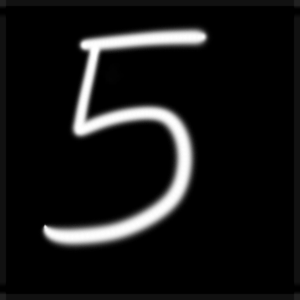

In [25]:
test_image = open_image('data/a005.png')
test_image

In [26]:
learner.predict(test_image)

(Category 5,
 tensor(5),
 tensor([1.1802e-07, 1.6892e-07, 9.6615e-07, 7.8691e-06, 2.1158e-07, 9.9998e-01,
         1.1196e-06, 5.0463e-06, 2.5258e-06, 5.3528e-06]))